In [1]:
!pip install plotly

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [3]:
df = pd.read_csv('./College.csv')
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [4]:
df.isnull().sum()
#no missing values

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [5]:
df.dtypes
#checking for data types

Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [6]:
#checking 'Private' column
df['Private'].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [7]:
#converting everything to non-string
df['Private'] = df['Private'].map(lambda x: 1 if x =='Yes' else 0)
df['Private'].value_counts()

1    565
0    212
Name: Private, dtype: int64

In [8]:
#confirming
df.dtypes

Unnamed: 0      object
Private          int64
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [9]:
df.describe()
#checking columns, note that max Grad.Rate is 118

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,0.727156,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,0.445708,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,0.000000,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,0.000000,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1.000000,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,1.000000,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,1.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [10]:
#check for over 100 grad. rate
df[df['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,1,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [11]:
#might be a error in the df, changing it to 100.
df[df['Grad.Rate'] > 100] = 100
df[df['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [12]:
df['cost'] = df['Outstate'] + df['Room.Board'] + df['Books'] + df['Personal']
df['degree'] = (df['PhD'] + df['Terminal']) / 2
df['accept.rate'] = df['Accept'] / df['Apps']
df['under'] = df['F.Undergrad'] + df['P.Undergrad']
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cost,degree,accept.rate,under
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,...,70,78,18.1,12,7041,60,13390,74.0,0.742169,3422
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,...,29,30,12.2,16,10527,56,20980,29.5,0.880146,3910
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,...,53,66,12.9,30,8735,54,16565,59.5,0.768207,1135
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,...,92,97,7.7,37,19016,59,19735,94.5,0.836930,573
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,...,76,72,11.9,2,10922,15,13980,74.0,0.756477,1118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,0,2197,1515,543,4,26,3089,2029,6797,...,60,60,21.0,14,4469,40,12397,60.0,0.689577,5118
773,Xavier University,1,1959,1805,695,24,47,2849,1107,11520,...,73,75,13.3,31,9189,83,18330,74.0,0.921388,3956
774,Xavier University of Louisiana,1,2097,1915,695,34,61,2793,166,6900,...,67,75,14.4,20,8323,49,12498,71.0,0.913209,2959
775,Yale University,1,10705,2453,1317,95,99,5217,83,19840,...,96,96,5.8,49,40386,99,29095,96.0,0.229145,5300


In [13]:
X = df[['cost','degree','accept.rate','under','Top25perc','perc.alumni','Expend','Grad.Rate']]
X

,cost,degree,accept.rate,under,Top25perc,perc.alumni,Expend,Grad.Rate
0,13390,74.0,0.742169,3422,52,12,7041,60
1,20980,29.5,0.880146,3910,29,16,10527,56
2,16565,59.5,0.768207,1135,50,30,8735,54
3,19735,94.5,0.836930,573,89,37,19016,59
4,13980,74.0,0.756477,1118,44,2,10922,15
...,...,...,...,...,...,...,...,...
772,12397,60.0,0.689577,5118,26,14,4469,40
773,18330,74.0,0.921388,3956,47,31,9189,83
774,12498,71.0,0.913209,2959,61,20,8323,49
775,29095,96.0,0.229145,5300,99,49,40386,99


In [14]:
#clustering
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scale = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
X_scale

,cost,degree,accept.rate,under,Top25perc,perc.alumni,Expend,Grad.Rate
0,-0.696412,-0.152359,-0.033272,-0.193496,-0.195568,-0.854797,-0.499006,-0.317993
1,0.915588,-3.144704,0.904097,-0.110092,-1.354768,-0.539573,0.167637,-0.551805
2,-0.022090,-1.127392,0.143625,-0.584368,-0.296368,0.563712,-0.175055,-0.668710
3,0.651169,1.226138,0.610504,-0.680419,1.669233,1.115354,1.791027,-0.376446
4,-0.571105,-0.152359,0.063931,-0.587273,-0.598768,-1.642858,0.243175,-2.948375
...,...,...,...,...,...,...,...,...
772,-0.907310,-1.093771,-0.390562,0.096368,-1.505968,-0.697185,-0.990861,-1.487051
773,0.352769,-0.152359,1.184280,-0.102230,-0.447568,0.642518,-0.088234,1.026424
774,-0.885859,-0.354090,1.128715,-0.272627,0.258033,-0.224349,-0.253843,-0.960975
775,2.639091,1.327003,-3.518562,0.127474,2.173234,2.061027,5.877708,1.961671


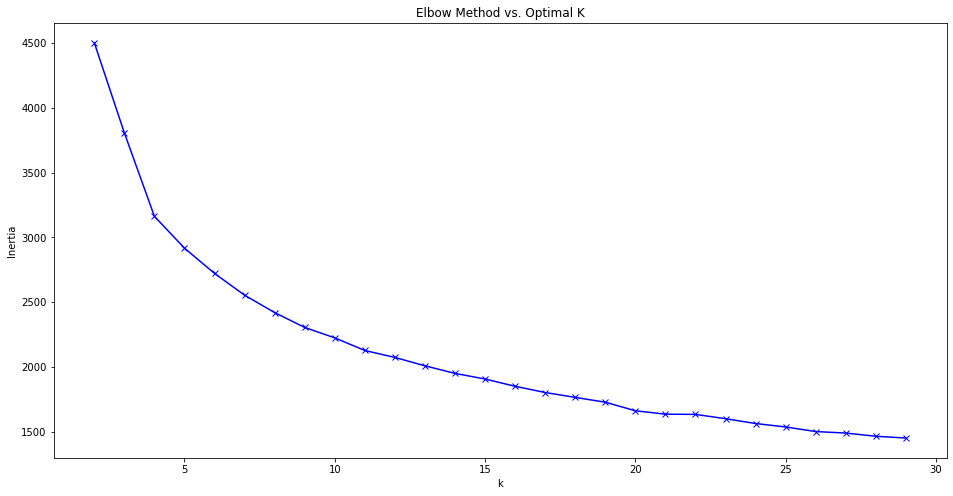

In [15]:
from sklearn.cluster import KMeans
inertia = []
K = range(2,30)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scale)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method vs. Optimal K')
plt.show()
#elbow at 4 clusters

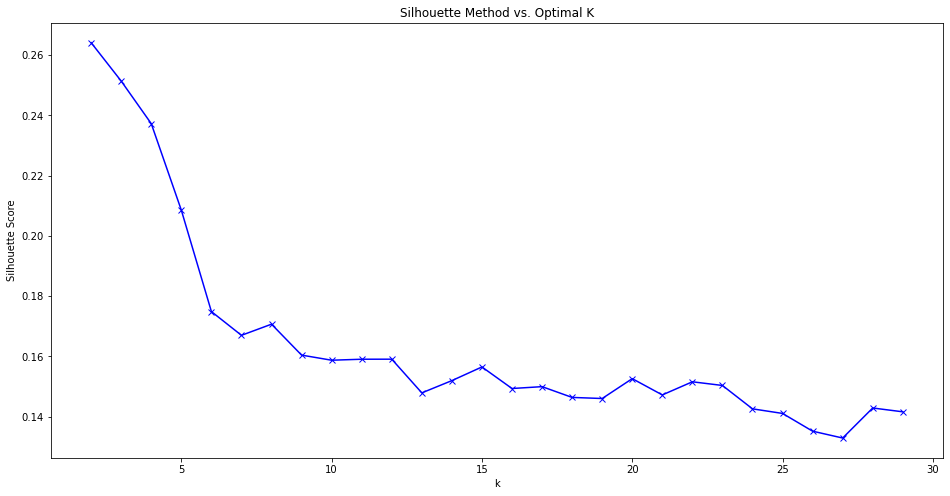

In [16]:
from sklearn.metrics import silhouette_score

sil_score = []
K = range(2,30)
for k in K:
    kmeans = KMeans(n_clusters=k)
    sil_score.append(silhouette_score(X_scale, kmeans.fit_predict(X_scale)))
plt.figure(figsize=(16,8))
plt.plot(K, sil_score, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method vs. Optimal K')
plt.show()


In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scale)
kmeans.cluster_centers_

array([[ 1.07015017,  0.78370777, -0.3808428 , -0.29192447,  0.85376517,
         0.83837909,  0.85876041,  0.83003227],
       [-0.61690835,  0.61664669, -0.40170138,  1.70240387,  0.16140095,
        -0.67526176, -0.26553036, -0.52191892],
       [-0.42893106, -0.66498807,  0.35666102, -0.38678955, -0.55683013,
        -0.27299454, -0.4195758 , -0.31842592]])

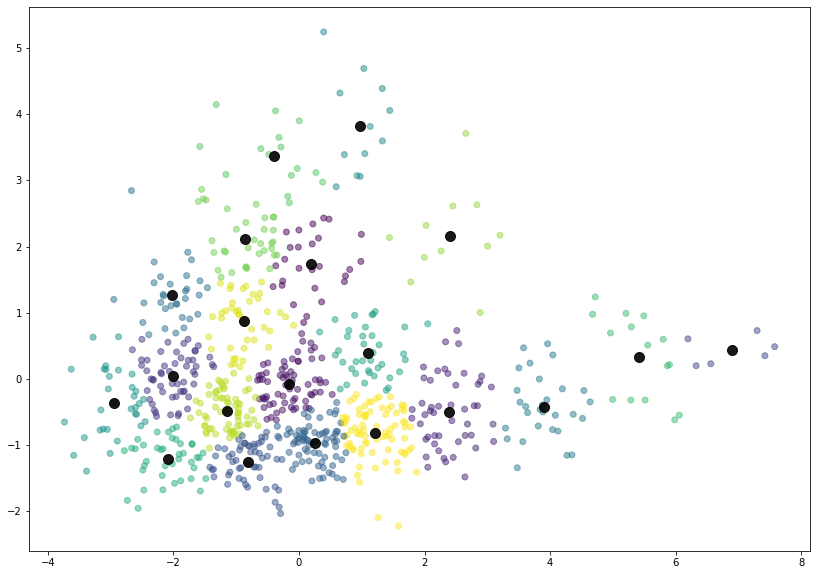

In [18]:
#showing dimensionality-reduced clusters with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(X_scale)
df2 = pd.DataFrame(pc)
km=KMeans(n_clusters=20)
X_clustered=km.fit_predict(df2)
df2['cluster'] = X_clustered

center=km.cluster_centers_

plt.figure(figsize=(14,10))
plt.scatter(pc[:,0],pc[:,1],c=df2['cluster'],alpha=0.5)
plt.scatter(center[:, 0], center[:, 1], c='black', s=100, alpha=0.9)
plt.show()


In [19]:
#cluster centers
km=KMeans(n_clusters=20)
X_clustered=km.fit_predict(X_scale)
centers = pd.DataFrame(km.cluster_centers_,columns=X.columns)
center_inverse = pd.DataFrame(scale.inverse_transform(centers), columns=X.columns)
center_inverse.style.background_gradient()


,cost,degree,accept.rate,under,Top25perc,perc.alumni,Expend,Grad.Rate
0,14853.500000,90.062500,0.683273,26483.208333,77.708333,17.750000,10103.750000,62.958333
1,15200.232558,76.534884,0.820917,2335.209302,72.744186,17.651163,8439.418605,58.767442
2,25463.080000,93.700000,0.465517,2283.440000,90.960000,49.000000,17710.360000,91.720000
3,11653.000000,72.112069,0.888373,4071.655172,36.396552,12.310345,6148.275862,47.551724
4,13290.371429,82.285714,0.519726,6851.057143,57.285714,12.771429,7533.314286,56.171429
5,25200.928571,92.214286,0.657759,2237.178571,77.607143,35.250000,16560.642857,80.892857
6,15016.125000,59.750000,0.818157,1279.875000,44.232143,30.464286,7655.589286,55.785714
7,14477.871795,44.487179,0.863002,1818.897436,32.307692,12.230769,7672.384615,54.846154
8,18539.291667,77.260417,0.785263,2151.916667,37.041667,18.958333,9033.375000,63.458333
9,13645.370968,85.137097,0.769466,14873.241935,51.032258,14.338710,8052.500000,54.048387


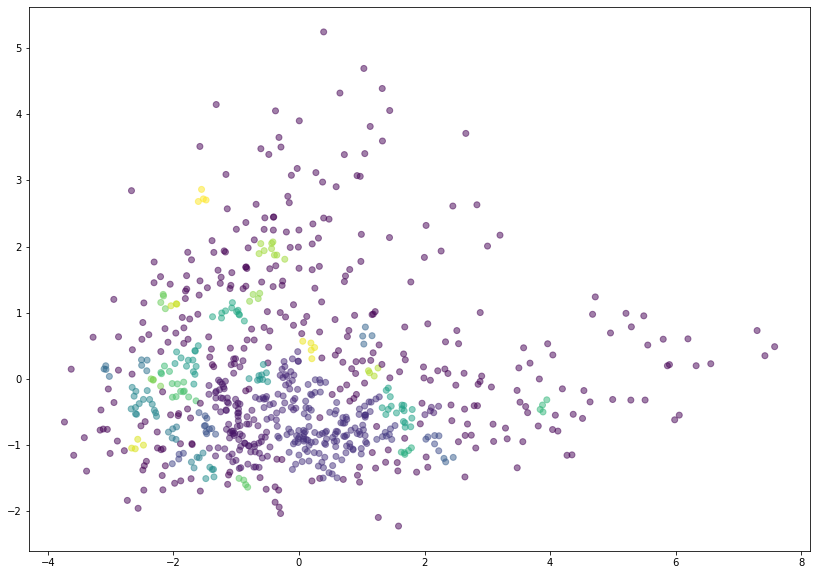

In [20]:
from sklearn.cluster import DBSCAN

scale = StandardScaler()
X_scale = pd.DataFrame(scale.fit_transform(X), columns=X.columns)


pca = PCA(n_components=2).fit_transform(X_scale)
df3 = pd.DataFrame(pca)
dbscan = DBSCAN(eps=0.15, min_samples=4)
X_clusters = dbscan.fit_predict(df3)
df3['cluster'] = X_clusters

plt.figure(figsize=(14,10))
plt.scatter(df3[0],df3[1],c=df3['cluster'],alpha=0.5)
plt.show()
#Tried several parameters and none of them seem to work properly, discard dbscan.

In [21]:
df3['cluster'].value_counts()

-1     331
 4     118
 1      83
 3      41
 19     18
 15     15
 18     13
 20     11
 24     10
 8      10
 17      9
 29      9
 5       8
 0       7
 7       6
 33      5
 21      5
 2       5
 16      5
 14      5
 13      5
 10      4
 32      4
 6       4
 30      4
 25      4
 11      4
 23      4
 34      4
 28      4
 27      4
 26      4
 22      4
 12      4
 9       3
 31      3
Name: cluster, dtype: int64

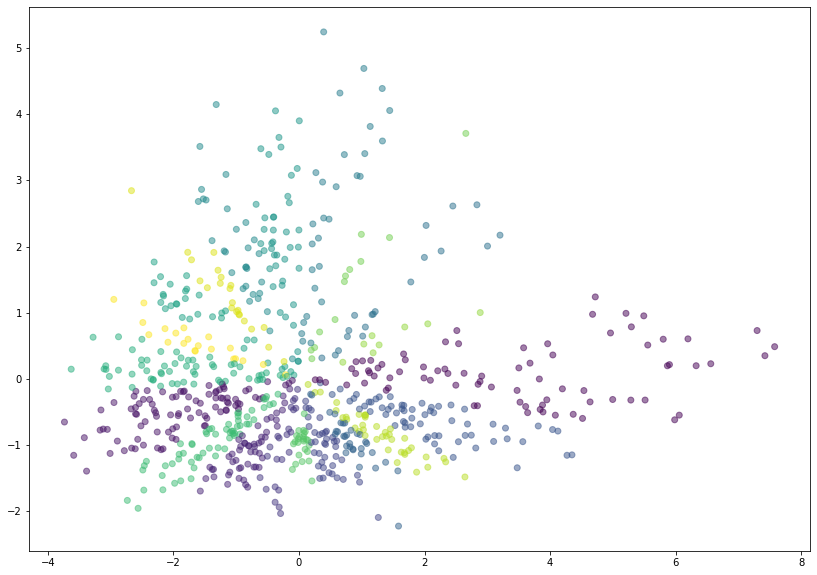

In [22]:
from sklearn.cluster import AgglomerativeClustering

scale = StandardScaler()
X_scale3 = pd.DataFrame(scale.fit_transform(X), columns=X.columns)


pca = PCA(n_components=2).fit_transform(X_scale3)
df4 = pd.DataFrame(pca)
agg = AgglomerativeClustering(linkage='complete', affinity='cosine', n_clusters=20)
X_clusters = agg.fit_predict(df4)

plt.figure(figsize=(14,10))
plt.scatter(pc[:,0],pc[:,1],c=X_clusters,alpha=0.5)
plt.show()

In [23]:
X_scale3['cluster'] = X_clusters
pd.DataFrame(scale.inverse_transform(X_scale3.groupby('cluster').mean()),columns=X.columns).style.background_gradient()

,cost,degree,accept.rate,under,Top25perc,perc.alumni,Expend,Grad.Rate
0,23820.949367,92.354430,0.554626,3500.177215,84.037975,32.177215,18333.050633,85.000000
1,13543.750000,61.842391,0.831257,1814.304348,37.304348,14.184783,7011.750000,54.206522
2,16318.423077,62.567308,0.828061,1608.788462,43.596154,26.423077,7718.769231,66.846154
3,16169.173913,67.130435,0.810737,1446.000000,49.913043,29.434783,8523.130435,72.826087
4,17982.256410,73.743590,0.814204,1627.615385,57.333333,33.666667,9216.153846,75.743590
5,21732.809524,89.333333,0.738351,2027.587302,71.952381,36.126984,13174.952381,79.253968
6,18737.031250,80.812500,0.805461,1668.156250,60.625000,36.218750,9617.312500,75.093750
7,18210.578947,85.394737,0.557496,9148.578947,78.631579,19.578947,12390.263158,74.157895
8,15099.857143,88.517857,0.681391,19116.892857,73.428571,17.964286,10120.821429,64.964286
9,13118.733333,86.516667,0.729749,13546.200000,49.500000,13.133333,7218.233333,50.200000


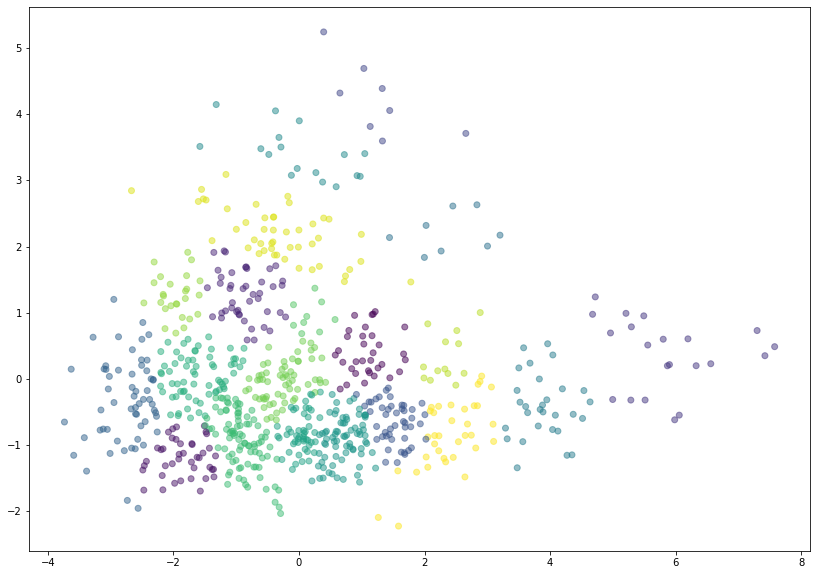

In [24]:
from sklearn.mixture import GaussianMixture

scale = StandardScaler()
X_scale4 = pd.DataFrame(scale.fit_transform(X), columns=X.columns)


pca = PCA(n_components=2).fit_transform(X_scale4)
df5 = pd.DataFrame(pca)
gmm = GaussianMixture(n_components=20, random_state=123)
gmm_clusters = gmm.fit_predict(df5)


plt.figure(figsize=(14,10))
plt.scatter(pc[:,0],pc[:,1],c=gmm_clusters,alpha=0.5)
plt.show()

In [25]:
X_scale4['cluster'] = gmm_clusters
pd.DataFrame(scale.inverse_transform(X_scale4.groupby('cluster').mean()),columns=X.columns).style.background_gradient()

,cost,degree,accept.rate,under,Top25perc,perc.alumni,Expend,Grad.Rate
0,19527.666667,86.000000,0.680710,4345.727273,70.606061,18.454545,10923.666667,73.212121
1,15311.243902,50.926829,0.865296,1453.658537,34.121951,20.804878,7525.390244,56.756098
2,12796.204545,81.977273,0.691349,8587.000000,52.522727,14.318182,6849.068182,54.772727
3,26506.571429,96.476190,0.344063,4619.333333,96.619048,41.857143,30239.523810,95.428571
4,15186.250000,91.937500,0.589199,29793.500000,82.875000,19.375000,12134.875000,66.000000
5,20464.723404,87.159574,0.769528,1912.957447,67.063830,32.914894,11320.106383,79.851064
6,11426.689655,56.750000,0.862807,2676.706897,32.000000,11.482759,5915.137931,44.413793
7,20851.875000,91.000000,0.551259,15154.375000,88.750000,17.375000,15424.500000,77.750000
8,25265.344828,92.913793,0.548981,2526.620690,87.620690,44.000000,17243.379310,87.586207
9,13853.647059,88.882353,0.708964,24266.352941,71.823529,15.294118,8409.588235,57.470588


In [29]:
X_scale4['name'] = df['Unnamed: 0']
X_scale4[X_scale4['cluster'] == 3]

,cost,degree,accept.rate,under,Top25perc,perc.alumni,Expend,Grad.Rate,cluster,name
16,2.261683,1.293381,-3.508744,-0.505236,2.022034,3.164312,2.251520,2.020124,3,Amherst College
60,2.254674,1.226138,-3.012504,-0.522327,2.223634,2.297445,2.064684,1.786312,3,Bowdoin College
70,2.252338,1.562356,-3.326953,0.245744,1.971634,1.272967,2.063345,1.844765,3,Brown University
144,2.011069,1.427869,-3.134540,-0.191958,2.022034,-0.145543,4.013746,1.961671,3,Columbia University
158,2.250427,1.394247,-3.276999,-0.103255,2.173234,2.061027,3.818686,1.903218,3,Dartmouth College
174,2.051210,1.293381,-3.157268,0.288300,2.122834,1.666997,3.357237,1.844765,3,Duke University
191,1.784242,1.427869,-1.746364,0.201991,2.072434,0.406100,3.596472,1.786312,3,Emory University
221,2.364265,1.024407,-3.314386,0.296162,1.870834,0.327294,1.909401,1.727859,3,Georgetown University
250,2.261046,1.394247,-4.014474,0.449127,2.223634,2.297445,5.272069,2.020124,3,Harvard University
251,1.879815,1.595978,-2.253245,-0.665721,2.223634,1.824609,2.279249,2.020124,3,Harvey Mudd College
